<a href="https://colab.research.google.com/github/AndreyTamplon/Mathematical-statistics/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.stats import kstwobign
from bisect import bisect_left, bisect_right
from scipy.stats.distributions import chi2
sample = [0.494, 0.577, 0.193, 0.696, 0.749, 0.038, 0.611, 0.233, 0.144, 0.925,
          0.279, 0.225, 0.704, 0.506, 0.043, 0.141, 0.785, 0.403, 0.972, 0.877, 
          0.311, 0.210, 0.636, 0.043, 0.887, 0.488, 0.272, 0.742, 0.395, 0.187]
n = len(sample)

In [ ]:
def empirical_distribution_function(t):
  number_of_elements_less_than_t = 0
  for element in sample:
    if element < t:
      number_of_elements_less_than_t += 1
  return number_of_elements_less_than_t / n
def distribution_function(t):
  if t < 0:
    return 0
  if t > 1:
    return 1 
  return t

In [ ]:
def empirical_distribution_function_eq(t):
  number_of_elements_lesseq_than_t = 0
  for element in sample:
    if element <= t:
      number_of_elements_lesseq_than_t += 1
  return number_of_elements_lesseq_than_t / n

In [ ]:
y = []
x = []
for i in range (10000):
  x.append(i / 10000)
  y.append(empirical_distribution_function(x[i]))

In [ ]:
def draw_empirical_distribution_function():
  plt.rcParams["figure.figsize"] = [25.50, 6.50]
  plt.plot(x, y)
  plt.tick_params(axis='x', which='major', labelsize=13)
  plt.tick_params(axis='y', which='major', labelsize=13)
  plt.show()

In [ ]:
def draw_histogram():
  plt.hist(sample, bins = int(m.log2(n) + 1), range = (0, 1), color = 'green', edgecolor = 'white', density = 1)
  plt.show()

In [ ]:
def calc_d_n():
  d_n = 0
  sorted_sample = sorted(sample)
  d_point = 0
  for i in x:
    if(abs(empirical_distribution_function(i) - distribution_function(i)) > d_n):
      d_n = abs(empirical_distribution_function(i) - distribution_function(i))
      d_point = i
  return (d_n, d_point)

In [ ]:
def test_the_hypotethis_kolmogorov(epsilon):
  q = kstwobign.ppf(1 - epsilon)
  if(m.sqrt(n) * calc_d_n()[0] < q):
    print("Гипотеза принимается")
  else:
    print("Гипотеза отклоняется")

In [ ]:
def test_the_hypotethis_pirson(epsilon, k, a, b):
  partition = []
  p = []
  q = chi2.ppf(1 - epsilon, k - 1)
  v = []
  psi = 0
  for i in range(k + 1):
    partition.append(((b - a) * i)/k)
    if(i < k):
      p.append((b - a) / k)
      v.append(0)
  for i in range(k):
    for element in sample:
      if(element > partition[i] and element < partition[i + 1]):
        v[i] += 1
  for i in range(k):
    psi += ((v[i] - n * p[i]) ** 2) / (n * p[i])
  print(q)
  print(psi)
  if(psi < q):
    print("Гипотеза принимается")
  else:
    print("Гипотеза отклоняется")

# **График эмпирической функции распределения**

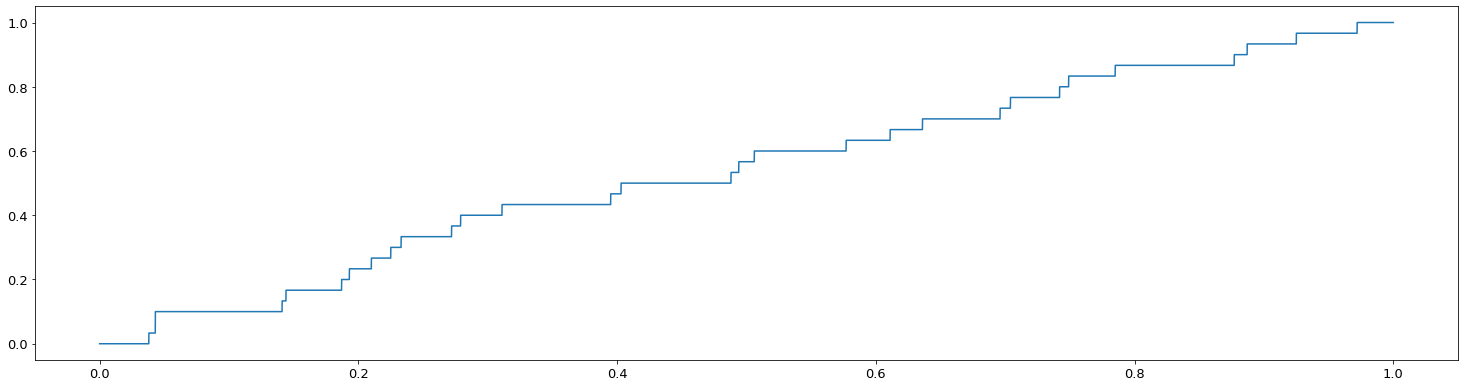

In [ ]:
draw_empirical_distribution_function()

# **Гистограмма**

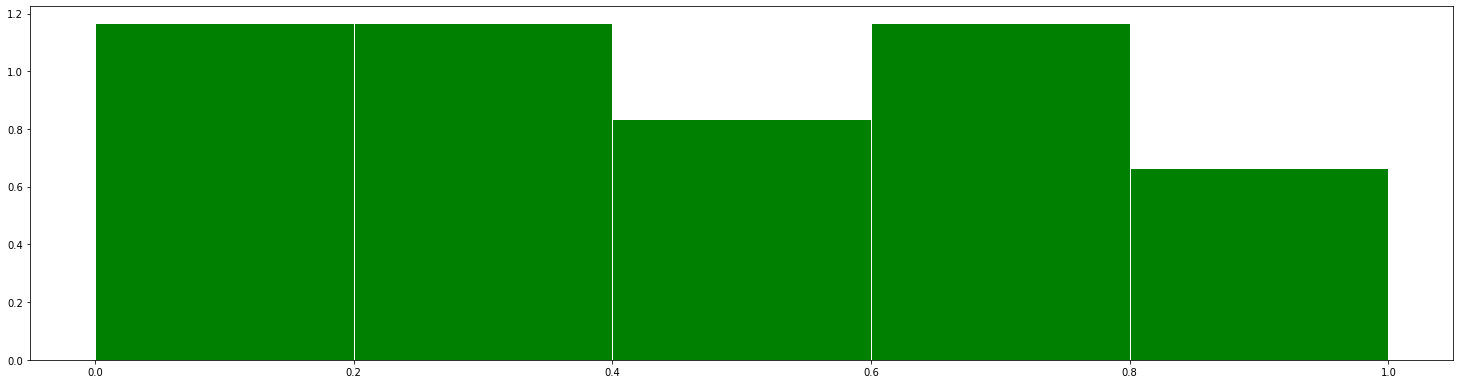

In [ ]:
draw_histogram()

#  **Проверка основной гипотезы о равномерности распределения c помощью критерия Колмогорова**

$D_{n} = \sup_{y}|F_{n}^{*}(y) - F(y)|$

Тогда по теореме Колмогорова для любого $y > 0$ при $n → ∞$

$P(\sqrt{n}D_{n}<y)→𝒦(y)$

В нашем случае имеем: $H_{1}: F = U$ против $H_{2}: F \neq U$



In [ ]:
print("Dn = %0.3f" % calc_d_n()[0])
print("sqrt(n) * Dn = %0.3f" % (m.sqrt(n) * calc_d_n()[0]))
print("This value is reached at point = ", calc_d_n()[1])
print(empirical_distribution_function(0.311))

Dn = 0.122
sqrt(n) * Dn = 0.669
This value is reached at point =  0.3111
0.4


Если верна $H_{1}$, то $P_{1}(\sqrt{n}D_{n}<q) \approx K(q) = 1−ε$. Поэтому мы будем отвергать гипотезу $H_{1}$, если окажется, что $\sqrt{n}D_{n}>q$, т. е. если расхождение между эмпирической и гипотетической функциями распределения достаточно велико

In [ ]:
test_the_hypotethis_kolmogorov(0.06)

Гипотеза верна: наша выборка действительно имеет равномерное распределение


#  **Проверка основной гипотезы о равномерности распределения c помощью критерия хи-квадрат**

В предположении, что $X \subseteq F_{1}$, разобьем область возможных значений $X_{1}$ на некоторое количество непересекающихся промежутков:
$P_{1}(X_{1} ∈ ∆_{1} ∪ . . . ∪ ∆_{k}) = 1$, где $∆_{i}$ имеет вид $∆_{i} = 
[a_{i}, b_{i}), i = 1, ... , k$

$ν_{i}$ — число наблюдений, попавших в $∆_{i}$

$p_{i} = P_{1}(X_{1} ∈ ∆_{i}) = F_{1}(b_{i}) − F_{1}(a_{i})$

По ЗБЧ имеем:
$\frac{ν_{i}}{n} \stackrel{p}{→} p_{i} , n → ∞$
,если верна H_{1}

В качестве меры близости этих совокупностей предлагается использовать величину:
$𝚿_{n} = ∑_{i = 1}^{k}\frac{(v_{i}-np_{i})^2}{np_{i}}$

Тогда по теореме Пирсона, если $𝚿_{n} < q$, где q находится из равенства:
$χ_{n-1}^2(q) = 1 - ɛ$ то мы принимает гипотезу $H_{1}$

In [ ]:
test_the_hypotethis_pirson(0.06, 5, 0, 1)

9.044368368716608
1.3333333333333333
Гипотеза верна: наша выборка действительно имеет равномерное распределение
